In [ ]:
%cd
%cd /content/hyperspectral-cnn-soil-estimation/dataset

#Challenge train set: will be used for training and validation
!gdown https://drive.google.com/uc?id=1wD3vKqKEFh6OfrfLNtOENF-lbe4auQDb

#Challenge test set: no labels are provided, will be used for making inference
!gdown https://drive.google.com/uc?id=1XPaSRHsGHGkLieZnR6cU8-Bwg6_1kCTj

%cd

/root
/content/hyperspectral-cnn-soil-estimation/dataset
Downloading...
From (original): https://drive.google.com/uc?id=1wD3vKqKEFh6OfrfLNtOENF-lbe4auQDb
From (redirected): https://drive.google.com/uc?id=1wD3vKqKEFh6OfrfLNtOENF-lbe4auQDb&confirm=t&uuid=75040c95-61e4-4f15-ad13-4e384c5833bd
To: /content/hyperspectral-cnn-soil-estimation/dataset/train_tfrecords0.record
100% 2.94G/2.94G [00:28<00:00, 102MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1XPaSRHsGHGkLieZnR6cU8-Bwg6_1kCTj
From (redirected): https://drive.google.com/uc?id=1XPaSRHsGHGkLieZnR6cU8-Bwg6_1kCTj&confirm=t&uuid=e018f497-e15c-478e-be26-1e3fe8af51d0
To: /content/hyperspectral-cnn-soil-estimation/dataset/test_tfrecords0.record
100% 1.96G/1.96G [00:28<00:00, 68.2MB/s]
/root


In [ ]:
%cd
%cd /content/hyperspectral-cnn-soil-estimation

/root
/content/hyperspectral-cnn-soil-estimation


In [ ]:
test_set_path = '/content/hyperspectral-cnn-soil-estimation/dataset/test_tfrecords0.record'
train_set_path = '/content/hyperspectral-cnn-soil-estimation/dataset/train_tfrecords0.record'

In [ ]:
import os, logging
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
from dataset_processing import *
from dataset_analysis import *
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

train_data=load_tf_records(train_set_path)
test_data=load_tf_records(test_set_path)

In [ ]:
num_train_images = len(list(train_data))
print('train/val images: ', num_train_images)

num_test_images = len(list(test_data))
print('test images: ', num_test_images)

train/val images:  1732
test images:  1154


In [ ]:
train_data=train_data.map(decode_dataset_train_val)
test_data=test_data.map(decode_dataset_test)

In [ ]:
max_value_train = max_reflectance_train(train_data)
min_value_train = min_reflectance_train(train_data)
print('Max reflectance in train:', max_value_train)
print('Min reflectance in train:', min_value_train)

max_value_test = max_reflectance_test(test_data)
min_value_test = min_reflectance_test(test_data)
print('Max reflectance in test:', max_value_test)
print('Min reflectance in test:', min_value_test)

max_reflectance = np.amax([max_value_test, max_value_train])
print('Overall max reflectance:', max_reflectance)

Max reflectance in train: 5419
Min reflectance in train: -3
Max reflectance in test: 6315
Min reflectance in test: -13
Overall max reflectance: 6315


In [ ]:
shape_data_train = np.array(list(train_data.map(lambda image, label, height, width: tf.shape(image)[0:2]).as_numpy_iterator()))
h_dims_train, w_dims_train = np.hsplit(shape_data_train, 2)

shape_data_test = np.array(list(test_data.map(lambda filename, image, height, width: tf.shape(image)[0:2]).as_numpy_iterator()))
h_dims_test, w_dims_test = np.hsplit(shape_data_test, 2)

max_height_train = np.amax(h_dims_train)
max_width_train = np.amax(w_dims_train)
print('Max height train:', max_height_train)
print('Max width train:', max_width_train)

max_height_test = np.amax(h_dims_test)
max_width_test = np.amax(w_dims_test)
print('Max height test:', max_height_test)
print('Max width test:', max_width_test)

max_height = np.amax([max_height_test, max_height_train])
max_width = np.amax([max_width_test, max_width_train])
print('Max height:', max_height)
print('Max width:', max_width)

Max height train: 268
Max width train: 284
Max height test: 229
Max width test: 273
Max height: 268
Max width: 284


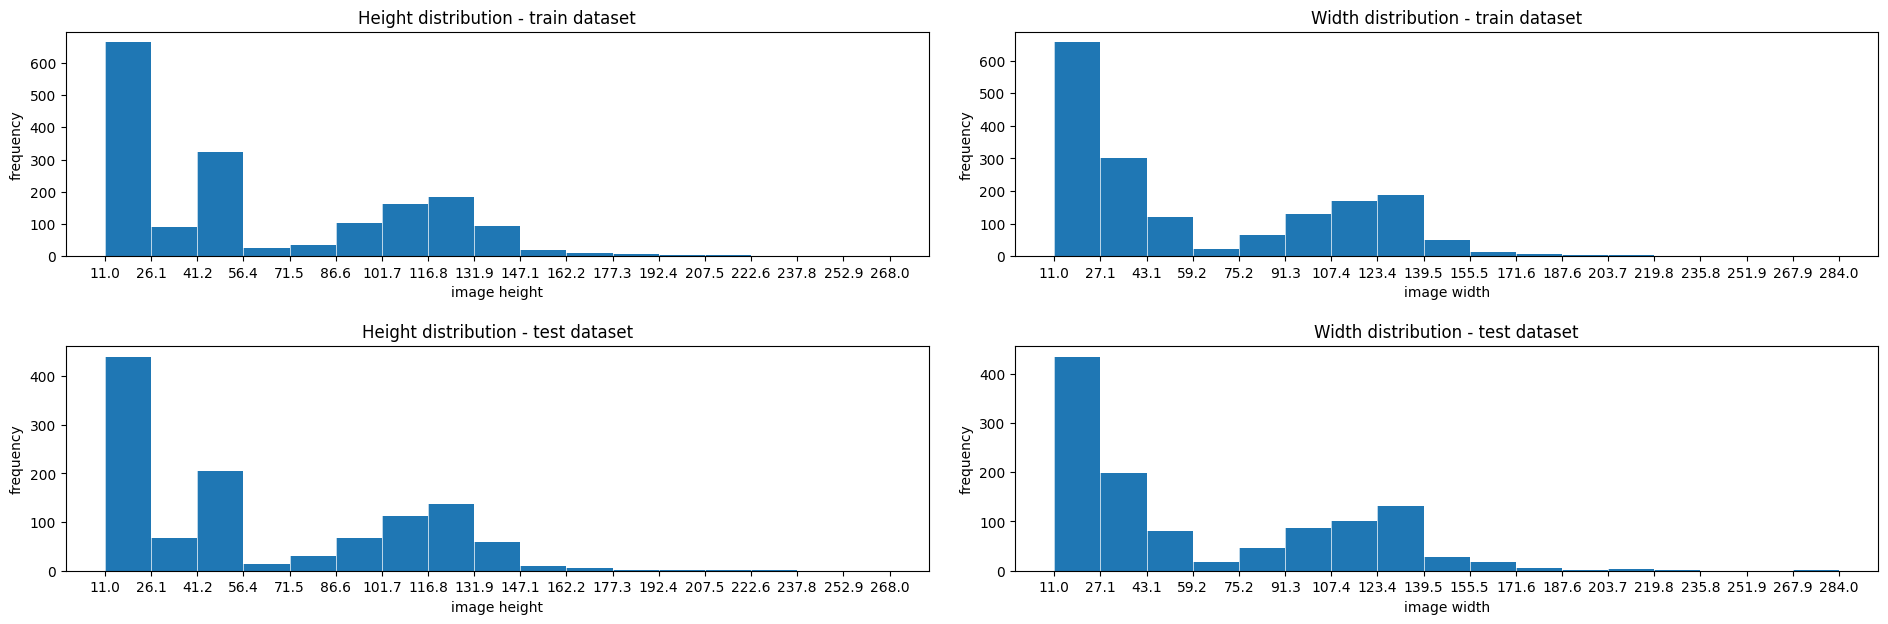

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(25,7))

plt.subplots_adjust(wspace=0.1, hspace=0.4, right=0.85)

n_h, bins_h, patches_h = axs[0,0].hist(h_dims_train, bins='auto')
axs[0,0].set_title('Height distribution - train dataset')
axs[0,0].set_xlabel('image height')
axs[0,0].set_ylabel('frequency')
axs[0,0].set_xticks(bins_h)
axs[0,0].grid(color='white', lw = 0.5, axis='x')

n_w, bins_w, patches_w = axs[0,1].hist(w_dims_train, bins='auto')
axs[0,1].set_title('Width distribution - train dataset')
axs[0,1].set_xlabel('image width')
axs[0,1].set_ylabel('frequency')
axs[0,1].set_xticks(bins_w)
axs[0,1].grid(color='white', lw = 0.5, axis='x')

n_h, bins_h, patches_h = axs[1,0].hist(h_dims_test, bins=bins_h)
axs[1,0].set_title('Height distribution - test dataset')
axs[1,0].set_xlabel('image height')
axs[1,0].set_ylabel('frequency')
axs[1,0].set_xticks(bins_h)
axs[1,0].grid(color='white', lw = 0.5, axis='x')

n_w, bins_w, patches_w = axs[1,1].hist(w_dims_test, bins=bins_w)
axs[1,1].set_title('Width distribution - test dataset')
axs[1,1].set_xlabel('image width')
axs[1,1].set_ylabel('frequency')
axs[1,1].set_xticks(bins_w)
axs[1,1].grid(color='white', lw = 0.5, axis='x')

plt.show()

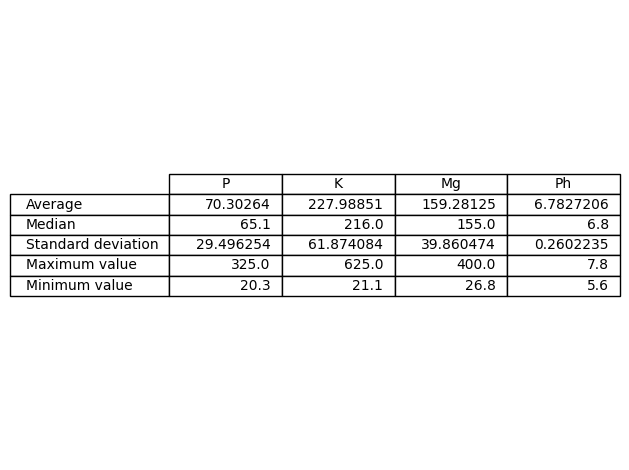

In [ ]:
gt_data = np.array(list((train_data.map(lambda image, label, height, width: label)).as_numpy_iterator()))

gt_avg = np.mean(gt_data, axis=0)
gt_median = np.median(gt_data, axis=0)
gt_std = np.std(gt_data, axis=0)
gt_max = np.amax(gt_data, axis=0)
gt_min = np.amin(gt_data, axis=0)
gt_stats = np.append([gt_avg], [gt_median, gt_std, gt_max,gt_min], axis=0)

fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

df=pd.DataFrame(gt_stats, columns=['P', 'K', 'Mg', 'Ph'],)

ax.table(cellText=df.values, colLabels=df.columns, rowLabels=['Average', 'Median', 'Standard deviation', 'Maximum value','Minimum value'], loc='center')

fig.tight_layout()

plt.show()

In [ ]:
%cd
%cd /content/hyperspectral-cnn-soil-estimation

#Challenge train set: will be used for training and validation
!gdown https://drive.google.com/uc?id=1wD3vKqKEFh6OfrfLNtOENF-lbe4auQDb

#Challenge test set: no labels are provided, will be used for making inference
!gdown https://drive.google.com/uc?id=1XPaSRHsGHGkLieZnR6cU8-Bwg6_1kCTj

%cd

/root
/content/hyperspectral-cnn-soil-estimation
Downloading...
From (original): https://drive.google.com/uc?id=1wD3vKqKEFh6OfrfLNtOENF-lbe4auQDb
From (redirected): https://drive.google.com/uc?id=1wD3vKqKEFh6OfrfLNtOENF-lbe4auQDb&confirm=t&uuid=3a67385c-430d-4781-ac14-282decc69e7c
To: /content/hyperspectral-cnn-soil-estimation/train_tfrecords0.record
100% 2.94G/2.94G [00:43<00:00, 67.2MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1XPaSRHsGHGkLieZnR6cU8-Bwg6_1kCTj
From (redirected): https://drive.google.com/uc?id=1XPaSRHsGHGkLieZnR6cU8-Bwg6_1kCTj&confirm=t&uuid=39d0cc9e-2d49-491c-ae70-989a77a48c71
To: /content/hyperspectral-cnn-soil-estimation/test_tfrecords0.record
100% 1.96G/1.96G [00:28<00:00, 69.0MB/s]
/root


In [ ]:
%cd
%cd /content/hyperspectral-cnn-soil-estimation

/root
/content/hyperspectral-cnn-soil-estimation


In [ ]:
train_set_path = '/content/hyperspectral-cnn-soil-estimation/train_tfrecords0.record'
test_set_path = '/content/hyperspectral-cnn-soil-estimation/test_tfrecords0.record'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os, zipfile, logging
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import random as rn
rn.seed(2)
import numpy as np
np.random.seed(3)
SEED = 7231
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

#Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

#Enable full deterministic operations
#This options slows down the training process remarkably but it allows to get
#deterministic results through different runs of the code
#note that results might differ on different hardware (cpu vs gpu) and on different computers
os.environ['TF_DETERMINISTIC_OPS'] = '1'

import tensorflow as tf
from dataset_processing import *
from efficientnet_lite import EfficientNetLiteB0mod
import tensorflow.keras.layers as layers

tf.random.set_seed(1)

AUTO = tf.data.AUTOTUNE

In [ ]:
noise_std = 0.05
epochs = 300
batch_size = 32
target_image_size = 32
start_lr = 0.005
network_name = 'cnn_final'

label_normalization_mode = 0 # 0 for minmax normalization, everything else for standard normalization

###########################################################
max_reflectance = 6315
test_set_len = 1153
max_labels = [325., 625., 400., 14.]
std_labels = [29.496254, 61.874084, 39.860474, 0.2602235]
mean_labels = [70.30264, 227.98851, 159.28125, 6.782706]
train_set_len = len(list(load_tf_records(train_set_path)))

num_train_images = (train_set_len//batch_size)*batch_size

Learning rate scheduling.

Learning rate per epoch:


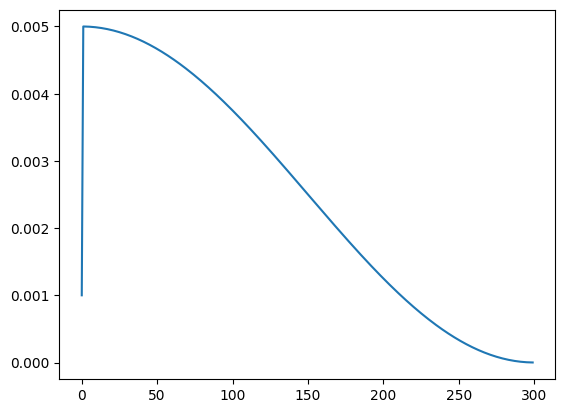

In [ ]:
alpha = 0.0001
decay_steps = epochs

def lr_scheduler(epoch, start_lr):
    if epoch < 1:
      lr = (start_lr-0.001)/1*epoch+0.001
    else:
      cosine_decay = 0.5 * (1 + tf.cos(np.pi * epoch / (decay_steps)))
      decayed = (1 - alpha) * cosine_decay + alpha
      lr = start_lr * decayed
    return float(lr)

lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: lr_scheduler(epoch, start_lr), verbose=0)

#Plot learning rate

x_range = np.arange(epochs)
y = [lr_scheduler(x, start_lr) for x in x_range]
plt.plot(x_range, y)
print('Learning rate per epoch:')

In [ ]:
base_path = 'networks/'

saved_model_filepath = base_path + network_name
h5_filepath = saved_model_filepath + '/'+network_name+'.h5'
submission_name = 'submission_files/sumbission_' + network_name + '.csv'
submission_zip = 'submission_files/sumbission_' + network_name + '.zip'

In [ ]:
def custom_metric(y_true, y_pred):
    y_true = tf.cond(tf.math.equal(label_normalization_mode,0),
                     lambda: tf.multiply(y_true, max_labels),
                     lambda: tf.multiply(y_true, std_labels)+mean_labels)
    y_pred = tf.cond(tf.math.equal(label_normalization_mode,0),
                     lambda: tf.multiply(y_pred, max_labels),
                     lambda: tf.multiply(y_pred, std_labels)+mean_labels)

    mse = tf.reduce_mean((y_true-y_pred)**2, axis=0)
    mse_baseline = [870.02899169921875, 3828.40234375, 1588.857421875, 0.0677162706851959228515625]
    score = tf.reduce_mean(mse/mse_baseline)

    return score

In [ ]:
backbone = EfficientNetLiteB0mod(input_shape=(target_image_size, target_image_size, 150),
                                   width_coefficient=0.5,
                                   depth_coefficient=0.5,
                                   dropout_rate=0.1
                                   )

model = tf.keras.Sequential([backbone,
                                layers.Flatten(),
                                layers.Dense(4, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=1509))])


model.compile(
    optimizer=tf.keras.optimizers.Adam(clipnorm=1.),
    loss='mse',
    metrics=[custom_metric],
  )

#Initialize the model with the same weights we employed during the competition
model.load_weights('efficientnet_lite/initialization_weigths.h5')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetlite0mod (Functional)    │ (None, 1, 1, 1280)          │         728,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           5,124 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 734,020 (2.80 MB)

 Trainable params: 719,780 (2.75 MB)

 Non-trainable params: 14,240 (55.62 KB)

In [ ]:
steps_per_epoch = num_train_images//batch_size

ds = load_tf_records(train_set_path).map(decode_dataset_train_val, num_parallel_calls=AUTO,deterministic=True)
ds = ds.shuffle(train_set_len, seed=1860)

#Train
train_data = ds.take(num_train_images)
train_data = train_data.map(lambda patch, label, height, width: normalize_train_val(patch, label, height, width, max_reflectance, max_labels, mean_labels, std_labels, label_normalization_mode), num_parallel_calls=AUTO,deterministic=True).cache()    #normalize train dataset
train_data = train_data.shuffle(num_train_images, seed=1866)    #shuffle train dataset
train_data = train_data.map(lambda patch, label, height, width: augment_train(patch, label, height, width,target_image_size,noise_std), num_parallel_calls=AUTO,deterministic=True)
train_data = train_data.batch(batch_size=batch_size, drop_remainder=True)    #batch train dataset
train_data = train_data.prefetch(AUTO)    #prefetch train dataset

#Validation
val_data_raw = ds.skip(num_train_images).cache()    #create a small validation dataset from the last elements of the train dataset that are discarded during batching
val_data = val_data_raw.map(lambda patch, label, height, width: normalize_train_val(patch, label, height, width, max_reflectance, max_labels, mean_labels, std_labels, label_normalization_mode), num_parallel_calls=AUTO).cache()    #normalize validation dataset
val_data = val_data.map(lambda patch, label, height, width: preprocess_val(patch, label, height, width,target_image_size), num_parallel_calls=AUTO)    #pad validation dataset
val_data = val_data.repeat()
val_data = val_data.batch(batch_size=batch_size, drop_remainder=True)    #batch validation dataset
val_data = val_data.prefetch(AUTO)    #prefetch validation dataset

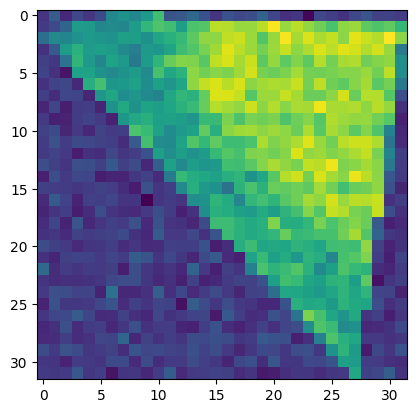

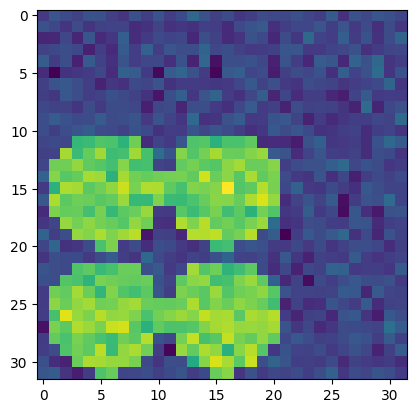

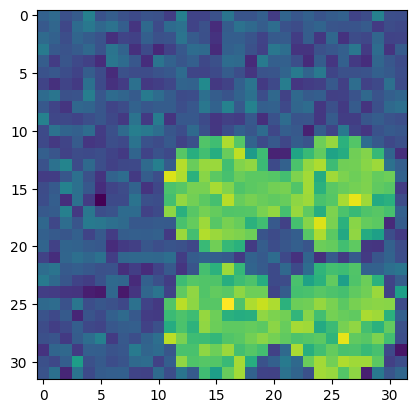

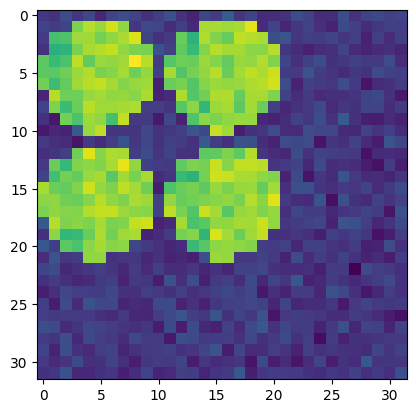

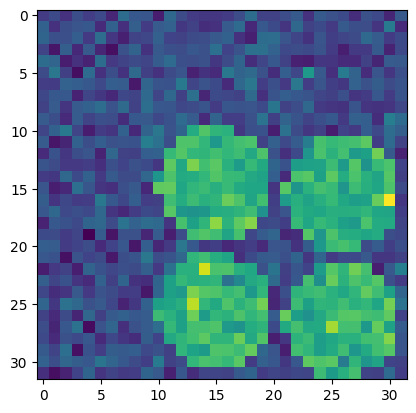

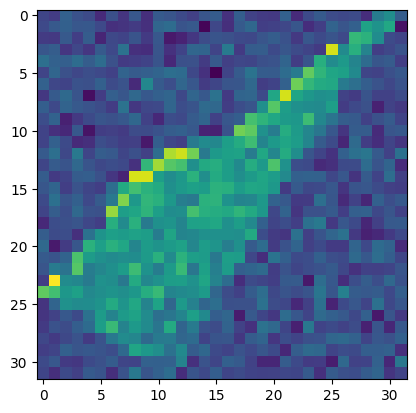

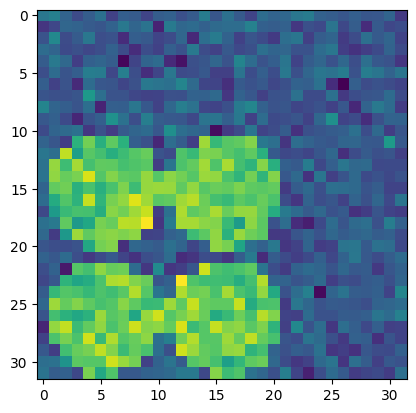

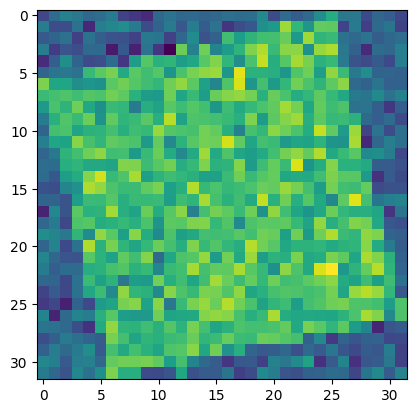

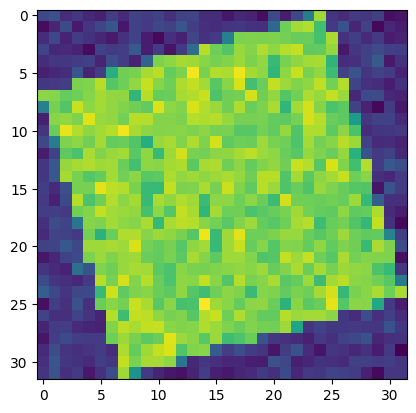

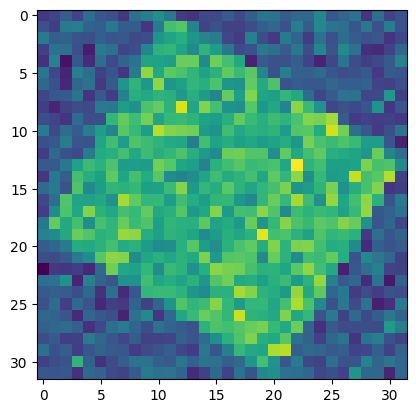

In [ ]:
for image, label in train_data.unbatch().take(10):
    plt.imshow(image[:,:,149])
    plt.show()

# Train neural network

In [ ]:
History = model.fit(train_data,
                    epochs=10,
                    callbacks=[lr_callback],
                    validation_data=val_data,
                    validation_steps=1,
                    verbose=1)

#Export trained model
#model.save(saved_model_filepath)
#model.save(h5_filepath)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 278ms/step - custom_metric: 4.9161 - loss: 0.0179 - val_custom_metric: 25.7857 - val_loss: 0.0312 - learning_rate: 0.0010
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 274ms/step - custom_metric: 8.5225 - loss: 0.0263 - val_custom_metric: 16.4707 - val_loss: 0.0651 - learning_rate: 0.0050
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 273ms/step - custom_metric: 18.3882 - loss: 0.0251 - val_custom_metric: 414.7565 - val_loss: 0.3428 - learning_rate: 0.0050
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 271ms/step - custom_metric: 23.1935 - loss: 0.0242 - val_custom_metric: 244.2399 - val_loss: 0.1081 - learning_rate: 0.0050
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 287ms/step - custom_metric: 12.1267 - loss: 0.0249 - val_custom_metric: 400.2142 - val_loss: 0.1780 - learning_rate: 0.0050
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 274ms/step - custom_metric: 13.2807 - loss: 0.0222 - val_custom_metric: 13.5055 - val_loss: 0.1048 - learning_rate: 0.0050
Epoch 7/1

In [ ]:
test_data = load_tf_records(test_set_path).map(decode_dataset_test, num_parallel_calls=AUTO)

test_data = test_data.map(lambda filename, patch, height, width: normalize_test(filename, patch, height, width, max_reflectance), num_parallel_calls=AUTO)    #normalize test dataset
test_data = test_data.map(lambda filename, patch, height, width: preprocess_test(filename, patch, height, width,target_image_size), num_parallel_calls=AUTO).batch(1).prefetch(AUTO)    #batch and prefetch test dataset

In [ ]:
loaded_model = tf.keras.models.load_model(saved_model_filepath, custom_objects={'custom_metric': custom_metric})

In [ ]:
filenames = np.array([],dtype=int)
export_predictions =  []

for filename, image, height, width in test_data:
  filenames = np.append(filenames, int(filename.numpy()[0].decode().replace(".npz", "")))
  predictions = loaded_model.predict(image,verbose=0)

  if label_normalization_mode == 0:

     predictions *= max_labels

  else:
     predictions  = (predictions*std_labels)+mean_labels

  export_predictions.append(predictions.reshape([-1]))

submission = pd.DataFrame(data=export_predictions, columns=["P", "K", "Mg", "pH"])
submission.index = filenames
submission.to_csv(submission_name, index_label="sample_index")

with zipfile.ZipFile(submission_zip, mode='w') as zipf:
    zipf.write(submission_name)